# WeatherPy

---

## Generate Random Geographic Coordinates and a List of More than 500 Cities

In [1]:
# Dependencies and Setup

import string
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print("api " + weather_api_key)

api bfa5fa2887bc6375787ed7e29fdf4636


### Generate the Cities List Using the "citipy" Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Python "zip()" will combine two lists into one list of tuples
# We want at least 500 cities but need to account for duplicates
# or no city present in the initial set of lat/longs requested

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm there are a sufficient number of cities

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the random cities list generated

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
# Get data in Farenheit for U.S. audience
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to display to create a log
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
# The default "start" value for enumerate() is zero, appropriate
# for iterating through an array

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # There is also a limit on requests per 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    # if no mode is specified, the default returned is json
    city_url = query_url + city
    
    # Print the city, record, and set numbers to keep user informed
    # of progress as the data is being retrieved
    
    print(f"Processing Record {record_count} of Set {set_count} for city {city}")
    
    # increment the record count
    record_count += 1

    # Run an API request for the city
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']["temp_max"])
        city_humidity = (city_weather['main']["humidity"])
        city_clouds = (city_weather['clouds']["all"])
        city_wind = (city_weather['wind']["speed"])
        city_country = (city_weather['sys']["country"])
        city_date = (city_weather['dt'])

        # Append the city information to the city_data list
        # Appending in this way will add
        # the information for this city as one entry
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error occurs, skip this city
    except:
        print("City not found.  Skipping...")
        pass
              
# Indicate that data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 for city bredasdorp
Processing Record 2 of Set 1 for city san vicente
Processing Record 3 of Set 1 for city uusikaupunki
Processing Record 4 of Set 1 for city ushuaia
Processing Record 5 of Set 1 for city puerto ayora
Processing Record 6 of Set 1 for city cabezon de la sal
Processing Record 7 of Set 1 for city mandali
Processing Record 8 of Set 1 for city freetown
Processing Record 9 of Set 1 for city ko pha ngan
Processing Record 10 of Set 1 for city puerto colombia
Processing Record 11 of Set 1 for city adamstown
Processing Record 12 of Set 1 for city saint-philippe
Processing Record 13 of Set 1 for city ilulissat
Processing Record 14 of Set 1 for city almeirim
Processing Record 15 of Set 1 for city edinburgh of the seven seas
Processing Record 16 of Set 1 for city port-aux-francais
Processing Record 17 of Set 1 for city albany
Processing Record 18 of Set 1 for city 

Processing Record 13 of Set 4 for city wenchang
Processing Record 14 of Set 4 for city holualoa
Processing Record 15 of Set 4 for city marathon
Processing Record 16 of Set 4 for city xai-xai
Processing Record 17 of Set 4 for city porangatu
Processing Record 18 of Set 4 for city ouadda
Processing Record 19 of Set 4 for city nizhnegorskiy
Processing Record 20 of Set 4 for city ketchikan
Processing Record 21 of Set 4 for city villa regina
Processing Record 22 of Set 4 for city orizona
Processing Record 23 of Set 4 for city saacow
Processing Record 24 of Set 4 for city karratha
Processing Record 25 of Set 4 for city afaahiti
Processing Record 26 of Set 4 for city constantia
Processing Record 27 of Set 4 for city tazovsky
Processing Record 28 of Set 4 for city saudarkrokur
Processing Record 29 of Set 4 for city st. john's
Processing Record 30 of Set 4 for city benxi
Processing Record 31 of Set 4 for city haiku-pauwela
Processing Record 32 of Set 4 for city new norfolk
Processing Record 33 o

Processing Record 25 of Set 7 for city flying fish cove
Processing Record 26 of Set 7 for city darnah
Processing Record 27 of Set 7 for city yarmouth
Processing Record 28 of Set 7 for city kone
Processing Record 29 of Set 7 for city kavieng
Processing Record 30 of Set 7 for city salinopolis
Processing Record 31 of Set 7 for city rudsar
Processing Record 32 of Set 7 for city labrador city
Processing Record 33 of Set 7 for city pisco
Processing Record 34 of Set 7 for city saint-francois
Processing Record 35 of Set 7 for city abilene
Processing Record 36 of Set 7 for city northam
Processing Record 37 of Set 7 for city satka
Processing Record 38 of Set 7 for city butembo
Processing Record 39 of Set 7 for city touros
Processing Record 40 of Set 7 for city shuangjiang
Processing Record 41 of Set 7 for city al fuwayliq
Processing Record 42 of Set 7 for city souillac
Processing Record 43 of Set 7 for city tura
Processing Record 44 of Set 7 for city brookings
Processing Record 45 of Set 7 for c

Processing Record 39 of Set 10 for city benguela
Processing Record 40 of Set 10 for city singkil
Processing Record 41 of Set 10 for city dengi
Processing Record 42 of Set 10 for city xilin hot
Processing Record 43 of Set 10 for city ribeirao da ilha
Processing Record 44 of Set 10 for city cabedelo
Processing Record 45 of Set 10 for city hede
Processing Record 46 of Set 10 for city safonovo
Processing Record 47 of Set 10 for city niwai
Processing Record 48 of Set 10 for city bogale
Processing Record 49 of Set 10 for city tvoroyri
Processing Record 0 of Set 11 for city al hazm
Processing Record 1 of Set 11 for city prairie grove
Processing Record 2 of Set 11 for city beira
Processing Record 3 of Set 11 for city anna regina
Processing Record 4 of Set 11 for city holly hill
Processing Record 5 of Set 11 for city villa rica
Processing Record 6 of Set 11 for city egilsstadir
Processing Record 7 of Set 11 for city tanquian de escobedo
Processing Record 8 of Set 11 for city altamont
Processing

In [4]:
city_data

[{'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 53.28,
  'Humidity': 93,
  'Cloudiness': 44,
  'Wind Speed': 2.84,
  'Country': 'ZA',
  'Date': 1683607264},
 {'City': 'san vicente',
  'Lat': -26.6167,
  'Lng': -54.1333,
  'Max Temp': 52.83,
  'Humidity': 90,
  'Cloudiness': 99,
  'Wind Speed': 2.84,
  'Country': 'AR',
  'Date': 1683607264},
 {'City': 'uusikaupunki',
  'Lat': 60.8004,
  'Lng': 21.4084,
  'Max Temp': 43.57,
  'Humidity': 71,
  'Cloudiness': 84,
  'Wind Speed': 12.1,
  'Country': 'FI',
  'Date': 1683607265},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 40.66,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 18.41,
  'Country': 'AR',
  'Date': 1683606995},
 {'City': 'puerto ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 79.56,
  'Humidity': 96,
  'Cloudiness': 46,
  'Wind Speed': 3,
  'Country': 'EC',
  'Date': 1683607266},
 {'City': 'cabezon de la sal',
  'Lat': 43.3089,
  'Lng': -4.2302,
  'Max Temp': 61.8

In [5]:
# Create a Pandas DataFrame with the cities weather data 

city_data_df = pd.DataFrame(city_data)


# Display record counts
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample of the city data

city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,53.28,93,44,2.84,ZA,1683607264
1,san vicente,-26.6167,-54.1333,52.83,90,99,2.84,AR,1683607264
2,uusikaupunki,60.8004,21.4084,43.57,71,84,12.10,FI,1683607265
3,ushuaia,-54.8000,-68.3000,40.66,70,20,18.41,AR,1683606995
4,puerto ayora,-0.7393,-90.3518,79.56,96,46,3.00,EC,1683607266
5,cabezon de la sal,43.3089,-4.2302,61.83,75,100,3.96,ES,1683607266
6,mandali,33.7499,45.5541,86.38,17,36,9.22,IQ,1683607267
7,freetown,8.4840,-13.2299,74.53,89,100,9.62,SL,1683607078
8,ko pha ngan,9.7578,100.0291,88.48,73,97,2.98,TH,1683607267
9,puerto colombia,10.9878,-74.9547,80.69,90,38,19.26,CO,1683607267


In [7]:
# Export the city data into a csv file
# Create a unique index for the city

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data with its added City_ID indext

city_data_in_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,53.28,93,44,2.84,ZA,1683607264
1,san vicente,-26.6167,-54.1333,52.83,90,99,2.84,AR,1683607264
2,uusikaupunki,60.8004,21.4084,43.57,71,84,12.10,FI,1683607265
3,ushuaia,-54.8000,-68.3000,40.66,70,20,18.41,AR,1683606995
4,puerto ayora,-0.7393,-90.3518,79.56,96,46,3.00,EC,1683607266
5,cabezon de la sal,43.3089,-4.2302,61.83,75,100,3.96,ES,1683607266
6,mandali,33.7499,45.5541,86.38,17,36,9.22,IQ,1683607267
7,freetown,8.4840,-13.2299,74.53,89,100,9.62,SL,1683607078
8,ko pha ngan,9.7578,100.0291,88.48,73,97,2.98,TH,1683607267
9,puerto colombia,10.9878,-74.9547,80.69,90,38,19.26,CO,1683607267


### Create the Requested Scatter Plots

#### Latitude vs. Temperature

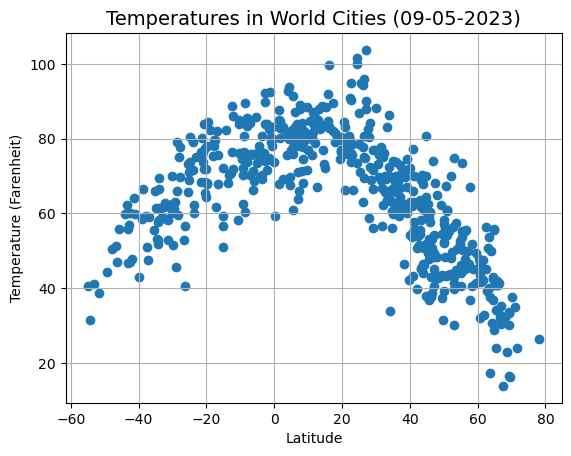

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Temperatures in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1_Lat_Humidity.png")

# Show plot
plt.show()


#### Latitude vs. Humidity

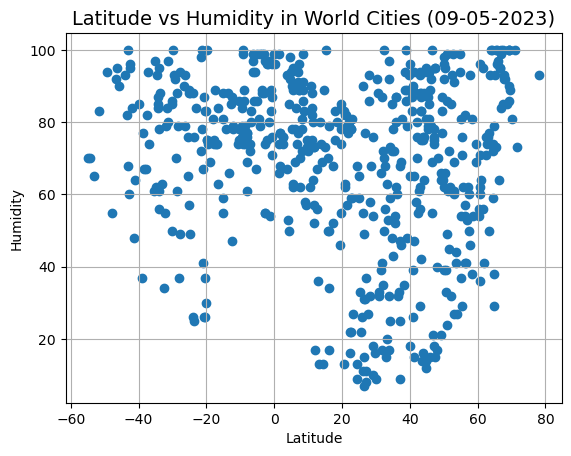

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Humidity in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

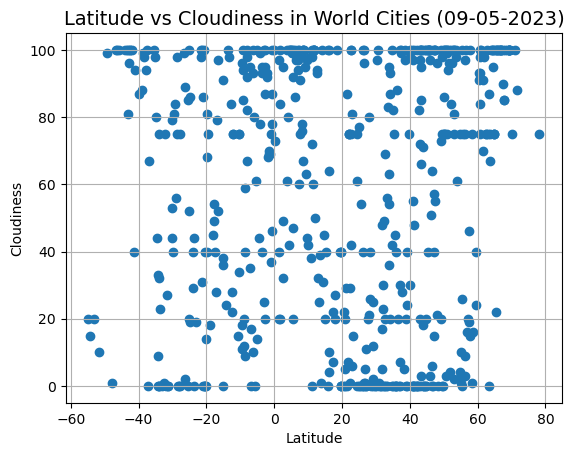

In [11]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Cloudiness in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

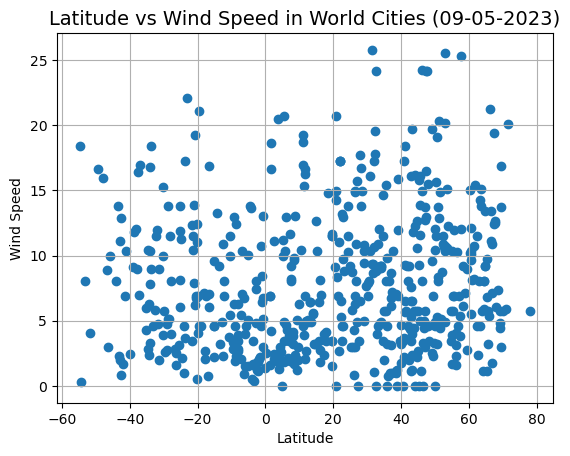

In [12]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Wind Speed in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4_Lat_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE